In [1]:
import numpy as np

import plotly.offline as offline       # a number of plotly goodies
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

from math import copysign
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt

### Colors


In [2]:
orange3 = '#fc8d59'
yellow3 = '#ffffbf'
blue3 = '#91bfdb'

#### Read data files

In [54]:
fileNameintScrew = 'intensityPsiScrew.out'
fileNamerealScrew = 'realPsiScrew.out'

nx = 100
ny = 300
nz = 200




PsiIntensityDataScrew = np.zeros((ny, nz))

normIscrew_list = []
    
with open(fileNameintScrew, "r") as data:
        for line in data: #read one line at a time               
            column = line.replace(']',' ').replace('[',' ').split()  

            normIscrew_list.append(float(column[0]))
                                     
normIscrew_list_ar = np.array(normIscrew_list)

PsiIntensityDataScrew[:,:] = normIscrew_list_ar.reshape((ny, nz)) 




PsiRealDataScrew = np.zeros((ny, nz))

normIrscrew_list = []    
    
    
with open(fileNamerealScrew, "r") as data:
        for line in data: #read one line at a time               
            column = line.replace(']',' ').replace('[',' ').split()  

            normIrscrew_list.append(float(column[0]))
                                     
normIrscrew_list_ar = np.array(normIrscrew_list)

PsiRealDataScrew[:,:] = normIrscrew_list_ar.reshape((ny, nz)) 
print PsiIntensityDataPerfect- PsiIntensityDataScrew

[[-0.55523819 -0.56909056 -0.59812541 ...  0.          0.
   0.        ]
 [-0.553085   -0.58231113 -0.62576814 ...  0.          0.
   0.        ]
 [-0.55147385 -0.59503314 -0.65014722 ...  0.          0.
   0.        ]
 ...
 [-0.55825036 -0.49875862 -0.45616035 ...  0.          0.
   0.        ]
 [-0.58664232 -0.53467012 -0.4938762  ...  0.          0.
   0.        ]
 [-0.6132479  -0.56592606 -0.5232549  ...  0.          0.
   0.        ]]


In [ ]:
fileNameintPerfect = 'intensityPsiPerfect.out'
fileNamerealPerfect = 'realPsiPerfect.out'


nx = 100
ny = 300
nz = 200


PsiIntensityDataPerfect = np.zeros((ny, nz))

normI_list = []
    
with open(fileNameintPerfect, "r") as data:
        for line in data: #read one line at a time               
            column = line.replace(']',' ').replace('[',' ').split()  

            normI_list.append(float(column[0]))
                                     
normI_list_ar = np.array(normI_list)

PsiIntensityDataPerfect[:,:] = normI_list_ar.reshape((ny, nz)) 




PsiRealDataPerfect = np.zeros((ny, nz))

normIr_list = []    
    
    
with open(fileNamerealPerfect, "r") as data:
        for line in data: #read one line at a time               
            column = line.replace(']',' ').replace('[',' ').split()  

            normIr_list.append(float(column[0]))
                                     
normIr_list_ar = np.array(normIr_list)

PsiRealDataPerfect[:,:] = normIr_list_ar.reshape((ny, nz)) 



In [57]:
dataC = [
    go.Contour(
        z = np.transpose(PsiIntensityDataScrew), 
        y = np.linspace(0., -2., 200),
        x = np.linspace(-1.50, 1.50, 300),
         
        contours=dict(
         showlines=False   
        )
    )
]
py.iplot(dataC)

In [47]:
dataC = [
    go.Contour(
        z = np.transpose(PsiIntensityDataPerfect- PsiIntensityDataScrew), 
        y = np.linspace(0., -0.5, 50),
        x = np.linspace(-1.50, 1.50, 300),
        
        contours=dict(
         showlines=False   
        )
    )
]
py.iplot(dataC)


In [64]:
dataC = [
    go.Contour(
        z = np.transpose(PsiRealDataScrew), 
        y = np.linspace(0., -2., 200),
        x = np.linspace(-1.5, 1.5, 300),
 
        autocontour=False,
        contours=dict(
            showlines=False, 
            start=-0.8,
            end=0.8,
            size=0.2,
        ),

    )
]
py.iplot(dataC)

In [49]:
dataC = [
    go.Contour(
        z = np.transpose(PsiRealDataPerfect- PsiRealDataScrew), 
        y = np.linspace(0., -0.5, 50),
        x = np.linspace(-1.50, 1.50, 300),
      
        contours=dict(
         showlines=False   
        )
    )
]
py.iplot(dataC)

In [7]:
w = [-1.25, -1.2, -1.15, -1.1, -1.05, -1.0, -0.95, -0.9, -0.85,\
     -0.8, -0.75, -0.7, -0.65, -0.6, -0.55, -0.5, -0.45, -0.4, -0.35,\
     -0.3, -0.25, -0.2, -0.15, -0.1, -0.05, 0.0, 0.05, 0.1, 0.15, 0.2, \
     0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, \
     0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3]
#w = range(-1.5, 1.5, 0.1)

folder =  'g210/perfect_'
params = '-none--70_0tilt-'

nx = 100
ny = 100

BrightData = np.zeros((len(w), nx, ny))
DarkData = np.zeros((len(w), nx, ny))
ContrastData = np.zeros((len(w), nx, ny))
DepthData = np.zeros((len(w), nx, ny))

for index, wi in enumerate(w):
    if wi <= 0:
        w_value = str(copysign(int(wi),wi))[0:2] + '_' + str(abs(wi - int(wi)))[2:]
    else:
        w_value = str(copysign(int(wi),wi))[0:2] + '_' + str(abs(wi - int(wi)))[2:]
    
    fileNameI0 = folder + 'bright' + params + '%sw.out' %w_value
    fileNameIg = folder + 'dark' + params + '%sw.out' %w_value
    fileNameC = folder + 'contrast' + params + '%sw.out' %w_value
    fileNameD = folder + 'depth' + params + '%sw.out' %w_value
    
    print 'wi:', wi
    
    print 'reading file', fileNameI0, '...'
    
    bright_list = [] 
    
    with open(fileNameI0, "r") as data:
        for line in data: #read one line at a time               
            column = line.replace(']',' ').replace('[',' ').split()  

            bright_list.append(float(column[0]))
                                     
    bright_list_ar = np.array(bright_list)
    #contrast.append(contrast_list_ar)
    BrightData[index,:,:] = bright_list_ar.reshape((nx, ny)) 

    print 'I0 for w =', wi, 'is between', min(bright_list), 'and', max(bright_list)  
    
    #------------------------------------------
    print 'reading file', fileNameIg, '...'
    
    dark_list = [] 
    
    with open(fileNameIg, "r") as data:
        for line in data: #read one line at a time               
            column = line.replace(']',' ').replace('[',' ').split()  

            dark_list.append(float(column[0]))
                                     
    dark_list_ar = np.array(dark_list)
    #contrast.append(contrast_list_ar)
    DarkData[index,:,:] = dark_list_ar.reshape((nx, ny)) 

    print 'Ig for w =', wi, 'is between', min(dark_list), 'and', max(dark_list)  
    
    #------------------------------------------
    
    print 'reading file', fileNameC, '...'
    
    contrast_list = [] 
    
    with open(fileNameC, "r") as data:
        for line in data: #read one line at a time               
            column = line.replace(']',' ').replace('[',' ').split()  

            contrast_list.append(float(column[0]))
                                     
    contrast_list_ar = np.array(contrast_list)
    #contrast.append(contrast_list_ar)
    ContrastData[index,:,:] = contrast_list_ar.reshape((nx, ny)) 

    print 'contrast for w =', wi, 'is between', min(contrast_list), 'and', max(contrast_list)  

    #------------------------------------------
    print 'reading file', fileNameD, '...'

    depth_list = [] 

    with open(fileNameD, "r") as data:
        for line in data: #read one line at a time               
            column = line.replace(']',' ').replace('[',' ').split()  

            depth_list.append(float(column[0]))
                        

    depth_list = np.array(depth_list) 
    #depth.append(depth_list)
    DepthData[index,:,:] = depth_list.reshape((nx, ny))

    print 'pen. depth', 'is between', min(depth_list), 'and', max(depth_list)  
    print
 

wi: -1.25
reading file g210/perfect_bright-none--70_0tilt--1_25w.out ...
I0 for w = -1.25 is between -8.82744188857e-09 and 2.67692712441e-09
reading file g210/perfect_dark-none--70_0tilt--1_25w.out ...
Ig for w = -1.25 is between -1.76066805579e-09 and 2.27814211939e-10
reading file g210/perfect_contrast-none--70_0tilt--1_25w.out ...
contrast for w = -1.25 is between -1.05495274738e-08 and 2.56284238276e-09
reading file g210/perfect_depth-none--70_0tilt--1_25w.out ...
pen. depth is between 0.620197129718 and 0.620197129723

wi: -1.2
reading file g210/perfect_bright-none--70_0tilt--1_2w.out ...
I0 for w = -1.2 is between -7.57393081585e-09 and 4.40661551693e-09
reading file g210/perfect_dark-none--70_0tilt--1_2w.out ...
Ig for w = -1.2 is between -1.65351821124e-09 and 5.32807575837e-10
reading file g210/perfect_contrast-none--70_0tilt--1_2w.out ...
contrast for w = -1.2 is between -8.72520899975e-09 and 4.93942309276e-09
reading file g210/perfect_depth-none--70_0tilt--1_2w.out ...
pen

#### Look at the intensity histogram of the image

In [31]:
mydata = []
trimmed_CD = []
for index, wi in enumerate(w):
    CD = ContrastData[index, :, :].flatten()
    # If sampled close enough to the dislocation a few extreme values will appear.
    # These are not representative for the overall contrast and we'll remove them.
    trimmed_CD.append(CD[(CD>-2) & (CD<2)])

    intProb = ff.create_distplot([trimmed_CD[index]], ['PDF'], bin_size = 0.02, show_hist=False, )

    intProb['layout'].update(title='Background corrected intensity frequency')

    mydata.append(intProb['data'])
    #py.iplot(intProb, filename = 'Intensity distribution' )
    filename='intDistr/Screw/g210_screw_prob_%sw_-2_2.png' % wi
    print '...plotting intesity distribution for w =', wi , 'in', filename, '...'
    print

    py.image.save_as(intProb, filename=filename)


...plotting intesity distribution for w = -1.25 in intDistr/Screw/g210_screw_prob_-1.25w_-2_2.png ...

...plotting intesity distribution for w = -1.2 in intDistr/Screw/g210_screw_prob_-1.2w_-2_2.png ...

...plotting intesity distribution for w = -1.15 in intDistr/Screw/g210_screw_prob_-1.15w_-2_2.png ...

...plotting intesity distribution for w = -1.1 in intDistr/Screw/g210_screw_prob_-1.1w_-2_2.png ...

...plotting intesity distribution for w = -1.05 in intDistr/Screw/g210_screw_prob_-1.05w_-2_2.png ...

...plotting intesity distribution for w = -1.0 in intDistr/Screw/g210_screw_prob_-1.0w_-2_2.png ...

...plotting intesity distribution for w = -0.95 in intDistr/Screw/g210_screw_prob_-0.95w_-2_2.png ...

...plotting intesity distribution for w = -0.9 in intDistr/Screw/g210_screw_prob_-0.9w_-2_2.png ...

...plotting intesity distribution for w = -0.85 in intDistr/Screw/g210_screw_prob_-0.85w_-2_2.png ...

...plotting intesity distribution for w = -0.8 in intDistr/Screw/g210_screw_prob_

-2.0 0
-1.5 0
-1.0 0
-0.5 0
0.0 0
0.5 0
1.0 0
1.5 0
2.0 0
-2.0 0
-1.5 0
-1.0 0
-0.5 0
0.0 0
0.5 0
1.0 0
1.5 0
2.0 0
-2.0 0
-1.5 0
-1.0 0
-0.5 0
0.0 0
0.5 0
1.0 0
1.5 0
2.0 0
-2.0 0
-1.5 0
-1.0 0
-0.5 0
0.0 0
0.5 0
1.0 0
1.5 0
2.0 0
-2.0 0
-1.5 0
-1.0 0
-0.5 0
0.0 0
0.5 0
1.0 0
1.5 0
2.0 0
-2.0 0
-1.5 0
-1.0 0
-0.5 0
0.0 0
0.5 0
1.0 0
1.5 0
2.0 0
-2.0 0
-1.5 0
-1.0 0
-0.5 0
0.0 0
0.5 0
1.0 0
1.5 0
2.0 0
-2.0 0
-1.5 0
-1.0 0
-0.5 0
0.0 0
0.5 0
1.0 0
1.5 0
2.0 0
-2.0 0
-1.5 0
-1.0 0
-0.5 0
0.0 0
0.5 0
1.0 0
1.5 0
2.0 0
-2.0 0
-1.5 0
-1.0 0
-0.5 0
0.0 0
0.5 0
1.0 0
1.5 0
2.0 0
-2.0 0
-1.5 0
-1.0 0
-0.5 0
0.0 0
0.5 0
1.0 0
1.5 0
2.0 0
-2.0 0
-1.5 0
-1.0 0
-0.5 0
0.0 0
0.5 0
1.0 0
1.5 0
2.0 0
-2.0 0
-1.5 0
-1.0 0
-0.5 0
0.0 0
0.5 0
1.0 0
1.5 0
2.0 0
-2.0 0
-1.5 0
-1.0 0
-0.5 0
0.0 0
0.5 0
1.0 0
1.5 0
2.0 0
-2.0 0
-1.5 0
-1.0 0
-0.5 0
0.0 0
0.5 0
1.0 0
1.5 0
2.0 0
-2.0 0
-1.5 0
-1.0 0
-0.5 0
0.0 0
0.5 0
1.0 0
1.5 0
2.0 0
-2.0 0
-1.5 0
-1.0 0
-0.5 0
0.0 0
0.5 0
1.0 0
1.5 0
2.0 0
-2.0 0
-1.5 0


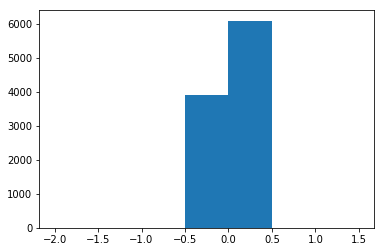

In [32]:
# Look at the surface spread of different intensity values
def thisIArea(thisI, image):
    ''' find the area in pixels where the intensity is equal or higher than a certain intensity value'''
    area = 0
    for pixelI in image:
        if (thisI > 0.) and (pixelI >= thisI):
            area = area + 1
        elif (thisI < 0.) and (pixelI <= thisI):
            area = area + 1
    return area


contrast = np.zeros(len(w))

for index, wi in enumerate(w):
    CD = ContrastData[index, :, :].flatten()
    hist, bin_edges = np.histogram(CD, bins=[-2., -1.5, -1.0, -0.5, 0., 0.5, 1.0, 1.5, 2.])
    
    for I in bin_edges:
        print I, thisIArea(I, CD)
        contrast[index] = contrast[index] + (abs(I)+0.25)*thisIArea(I, CD)
  #  print contrast[index]
   # print

plt.hist(CD, bins=[-2., -1.5, -1.0, -0.5, 0., 0.5, 1.0, 1.5])
plt.show()    


In [34]:
contrast = np.zeros(len(w))

#print mydata[32][0]['x']
for index, wi in enumerate(w):
    mydata_x = []
    mydata_x = mydata[index][0]['x']
    mydata_y = mydata[index][0]['y']

    # define the probability distribution function by interpolation
    probDistr = interp1d(mydata_x, mydata_y, bounds_error=False, fill_value=0.)
    #print abs(trimmed_CD[index]).sum()
    #print 
    #print '??', probDistr(trimmed_CD[index]).sum()
    #print
    # Define image contrast
    contrast[index] = (abs(trimmed_CD[index]) * probDistr(trimmed_CD[index])).sum()

#print    
print contrast

[ 1791.81614082  1776.4915651   1561.9118462   1430.77480417  3103.75942983
  1983.92479858  2164.04260094  2480.45975023  1513.05920933  1740.07570352
  1385.36682269  1755.79685056  1931.78739722  1600.38400003  1865.7008232
  2056.28399283  2078.64539685  2427.38895619  1383.60441909  1624.55723666
  1413.12870113  2266.92303107  1643.66257663  1559.37872186  2446.16781906
  2691.13648109  2535.80842522  1888.43304349  4087.19284545  2480.58541001
  3211.5580015   3018.0561015   3353.23939534  2846.01786826  1666.19043099
  1938.9298322   2229.43471228  1825.90774285  1880.09834457  3173.29010769
  2482.05758032  2008.69952603  1718.36037653  1700.81669311  1616.3334958
  1326.32175021  1396.35185474  2279.92322491  2160.32103858  1545.39773226
  1287.50041444  1405.48907419]


In [35]:
print contrast[contrast<2000]


# plot variation of image contrast versus w 
trace = go.Scatter(
    mode = 'lines',
    x = w, #np.asarray(w)[contrast<200],
    y = contrast
)


layout = dict(#title = 'Dislocation image contrast with w',
              xaxis = dict(title = 'Deviation from Bragg condition'),
              yaxis = dict(title = 'Image contrast [a. u.]',
                 # range=[0, 3000], 
                showline=False,
                autotick=True,
                ticks='',
                showticklabels=False, 
                showgrid = False          )
              )

data = [trace]
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='contrast')

[ 1791.81614082  1776.4915651   1561.9118462   1430.77480417  1983.92479858
  1513.05920933  1740.07570352  1385.36682269  1755.79685056  1931.78739722
  1600.38400003  1865.7008232   1383.60441909  1624.55723666  1413.12870113
  1643.66257663  1559.37872186  1888.43304349  1666.19043099  1938.9298322
  1825.90774285  1880.09834457  1718.36037653  1700.81669311  1616.3334958
  1326.32175021  1396.35185474  1545.39773226  1287.50041444  1405.48907419]


In [155]:
layout = go.Layout(
    autosize=False,
    width=500,
    height=500,
    
     xaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        autotick=True,
        ticks='',
        showticklabels=False
    ),
     yaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        autotick=True,
        ticks='',
        showticklabels=False
    ),
    )

for index, wi in enumerate(w):
    heatC = go.Heatmap(
        z=np.flipud(np.transpose(ContrastData[index])), #difference from saved format to plot mesh format
        colorscale='Greys',
        zauto=False,  # (!) custom color levels
        zmin=-5,     # (!) value of min color level
        zmax=5,       # (!) value of max color level
    )

    contour =  go.Contour(
        z=np.flipud(np.transpose(ContrastData[index])), #difference from saved format to plot mesh format
        colorscale='Greys',
        autocontour=False,
        contours=dict(
            start=-2,
            end=2,
            size=4,
            coloring='none'
        ),
    )


    data = [ heatC, contour]
    
    fig = go.Figure(data=data, layout=layout)
    #py.iplot(fig, filename='contrast_')
    filename='contrast/Screw/g210_screw_prob_%sw_-5_5.png' % wi
    print '...plotting contrast for w =', wi , 'in', filename, '...'
    print
    py.image.save_as(fig, filename=filename)

...plotting contrast for w = -1.3 in contrast/Screw/g210_screw_prob_-1.3w_-5_5.png ...

...plotting contrast for w = -1.25 in contrast/Screw/g210_screw_prob_-1.25w_-5_5.png ...

...plotting contrast for w = -1.2 in contrast/Screw/g210_screw_prob_-1.2w_-5_5.png ...

...plotting contrast for w = -1.15 in contrast/Screw/g210_screw_prob_-1.15w_-5_5.png ...

...plotting contrast for w = -1.1 in contrast/Screw/g210_screw_prob_-1.1w_-5_5.png ...

...plotting contrast for w = -1.05 in contrast/Screw/g210_screw_prob_-1.05w_-5_5.png ...

...plotting contrast for w = -1.0 in contrast/Screw/g210_screw_prob_-1.0w_-5_5.png ...

...plotting contrast for w = -0.95 in contrast/Screw/g210_screw_prob_-0.95w_-5_5.png ...

...plotting contrast for w = -0.9 in contrast/Screw/g210_screw_prob_-0.9w_-5_5.png ...

...plotting contrast for w = -0.85 in contrast/Screw/g210_screw_prob_-0.85w_-5_5.png ...

...plotting contrast for w = -0.8 in contrast/Screw/g210_screw_prob_-0.8w_-5_5.png ...

...plotting contrast f

PlotlyRequestError: 
<html><head>
<meta http-equiv="content-type" content="text/html;charset=utf-8">
<title>502 Server Error</title>
</head>
<body text=#000000 bgcolor=#ffffff>
<h1>Error: Server Error</h1>
<h2>The server encountered a temporary error and could not complete your request.<p>Please try again in 30 seconds.</h2>
<h2></h2>
</body></html>


In [57]:

heatD = go.Heatmap(
        z=np.flipud(np.transpose(DepthData)), #difference from saved format to plot mesh format
        colorscale='Blues',
        #zauto=False,  # (!) custom color levels
        #zmin=3,     # (!) value of min color level
        #zmax=-3,       # (!) value of max color level
    )

data = [ heatD]
    
fig = go.Figure(data=data, layout=layout)
#py.iplot(fig, filename='depth_w0')
py.image.save_as(fig, filename='screw_depth_-03w.png')

#### Rocking curves

In [32]:
brightFile = 'g210/I0_RockingCurve.out'
darkFile = 'g210/Ig_RockingCurve.out'

wRC = []
brightRC = []
darkRC = []
with open(brightFile, "r") as data:
    for line in data: #read one line at a time               
        column = line.split()  
        wRC.append(float(column[0]))
        brightRC.append(float(column[1]))
        
with open(darkFile, "r") as data:
    for line in data: #read one line at a time               
        column = line.split()  
        darkRC.append(float(column[1]))        
                                     


In [37]:
# plot variation of image contrast versus w 
total = [sum(x) for x in zip(darkRC, brightRC)]
print max(total)

trace_BRC = go.Scatter(
    mode = 'lines',
    x = wRC, 
    #y = [I0/max(total) for I0 in brightRC], 
    y = brightRC,
    name = 'Bright field',
    marker=dict(
        color = orange3 )
)

trace_DRC = go.Scatter(
    mode = 'lines',
    x = wRC, 
    #y = [Ig/max(total) for Ig in darkRC], 
    y = darkRC,
    name = 'Dark field',
    marker=dict(
    color = blue3 )
)

layout = dict(#title = 'Dislocation image contrast with w',
              xaxis = dict(title = 'w'),
              yaxis = dict(title = 'Normalised intensity [a. u.]',
                 # range=[0, 3000], 
                showline=False,
                autotick=True,
                ticks='',
                showticklabels=False, 
                showgrid = False          )
              )

data = [trace_BRC, trace_DRC]
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='rocking curves')

0.00328825209991
